# Logistic Regresssion  On Attrition Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Day21/Copy of general_data - general_data.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
df.Attrition

0        No
1       Yes
2        No
3        No
4        No
       ... 
4405     No
4406     No
4407     No
4408     No
4409     No
Name: Attrition, Length: 4410, dtype: object

#Converting The categorical Labels to 0=No and 1=yes

In [5]:
from sklearn.preprocessing import LabelEncoder


In [6]:
le = LabelEncoder()

In [7]:
df['Attrition'] = le.fit_transform(df['Attrition'])

In [8]:
df['Attrition']

0       0
1       1
2       0
3       0
4       0
       ..
4405    0
4406    0
4407    0
4408    0
4409    0
Name: Attrition, Length: 4410, dtype: int64

#EDA

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
Attrition,4410.0,0.161224,0.367780,0.0,0.00,0.0,0.00,1.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0


In [10]:
df.corr()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.006963,-0.035706,NaN,0.008649,-0.002884,-0.044314,0.299243,-0.033137,NaN,-0.031753,0.680661,-0.027308,0.311309,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.009730,-0.015111,NaN,-0.004729,-0.010290,-0.031176,0.042345,0.032533,NaN,-0.006839,-0.170338,-0.049431,-0.134392,-0.033019,-0.156199
DistanceFromHome,0.006963,-0.009730,1.000000,-0.008638,NaN,-0.001097,-0.037329,-0.021607,-0.013843,0.038125,NaN,0.011169,0.009374,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.015111,-0.008638,1.000000,NaN,-0.009680,0.045746,0.006410,-0.016250,-0.040531,NaN,0.001261,-0.010717,0.010472,0.006080,0.022490,0.005358
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008649,-0.004729,-0.001097,-0.009680,NaN,1.000000,-0.003303,0.007338,-0.001117,-0.004456,NaN,-0.014254,-0.001063,-0.010191,0.004086,0.000256,0.008579
JobLevel,-0.002884,-0.010290,-0.037329,0.045746,NaN,-0.003303,1.000000,0.047316,-0.009875,0.010973,NaN,0.000993,-0.036957,-0.032500,-0.064219,-0.060811,-0.055251
MonthlyIncome,-0.044314,-0.031176,-0.021607,0.006410,NaN,0.007338,0.047316,1.000000,-0.020726,0.004325,NaN,0.026930,-0.033787,0.050112,0.000995,0.065219,0.024304
NumCompaniesWorked,0.299243,0.042345,-0.013843,-0.016250,NaN,-0.001117,-0.009875,-0.020726,1.000000,0.030860,NaN,0.017163,0.238807,-0.032286,-0.117959,-0.036656,-0.109667
PercentSalaryHike,-0.033137,0.032533,0.038125,-0.040531,NaN,-0.004456,0.010973,0.004325,0.030860,1.000000,NaN,0.012548,-0.018736,-0.037392,-0.029707,-0.029542,-0.040864


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33bd6c8d68>,
      dtype=object)

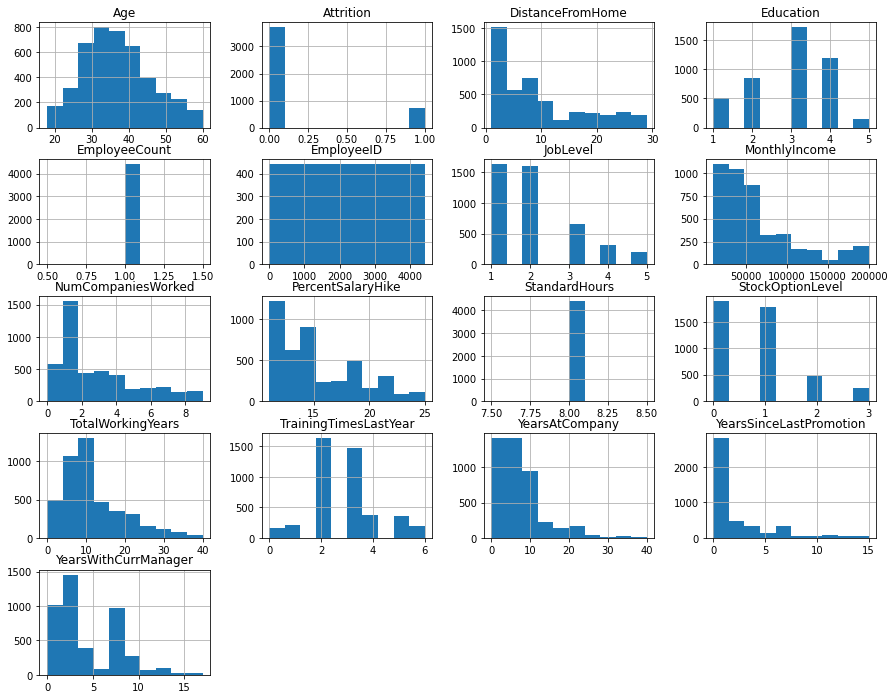

In [11]:
df.hist(figsize=(15,12))

###Monthly income has too many outliers

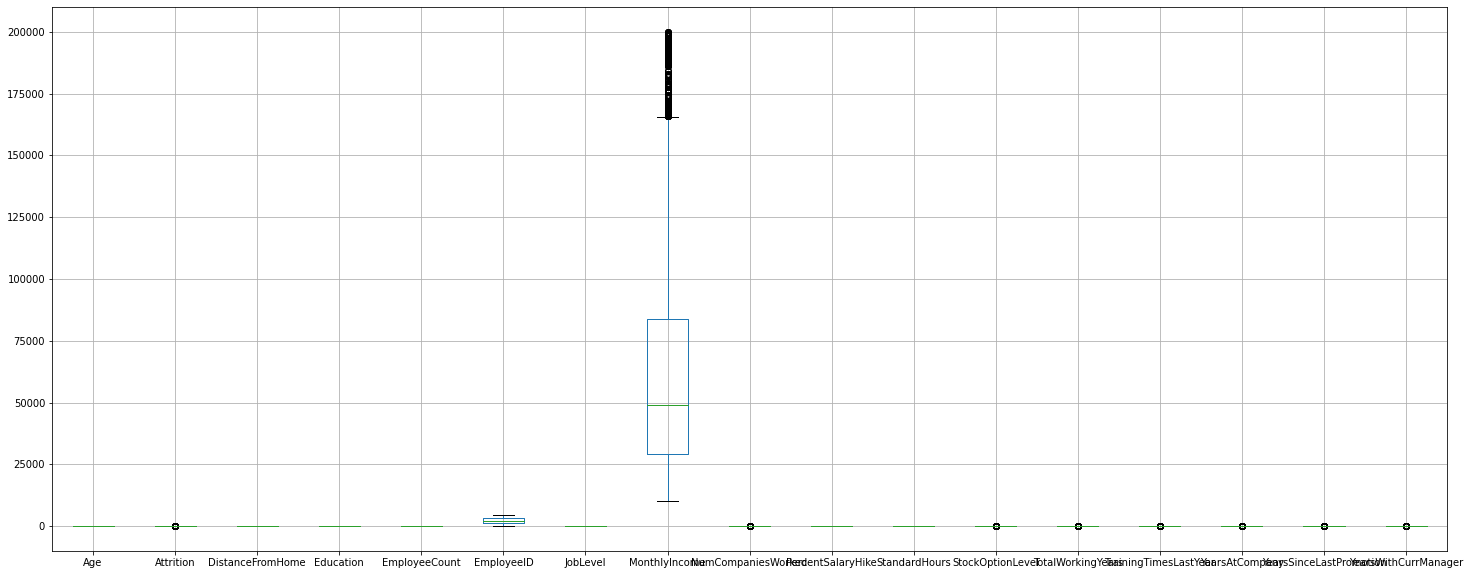

In [12]:
df.boxplot(figsize=(25,10))

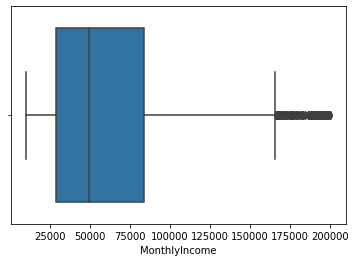

In [13]:
sns.boxplot(df['MonthlyIncome'])

#Data is not normally distributed

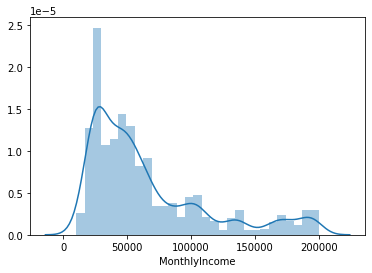

In [14]:
#Distplot
sns.distplot(df['MonthlyIncome'])

#Heatmap

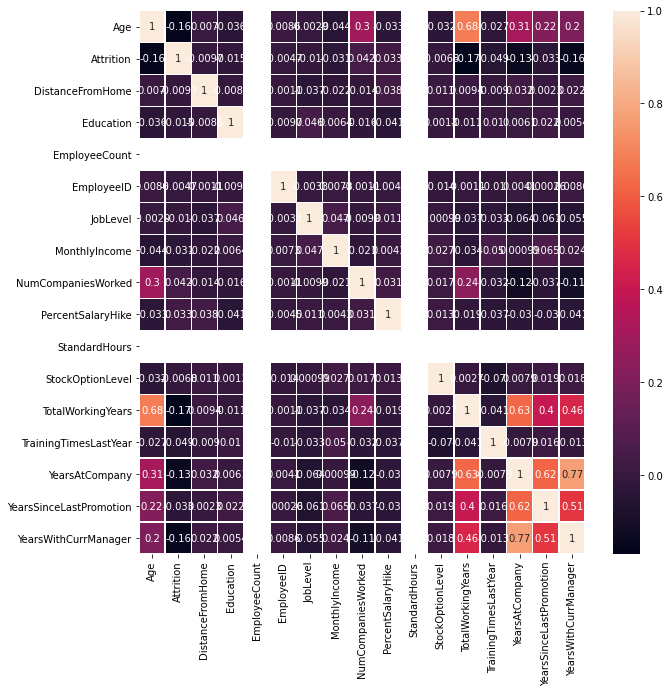

In [15]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

sns.heatmap(df.corr(),annot=True,ax=ax,linewidths=0.5)

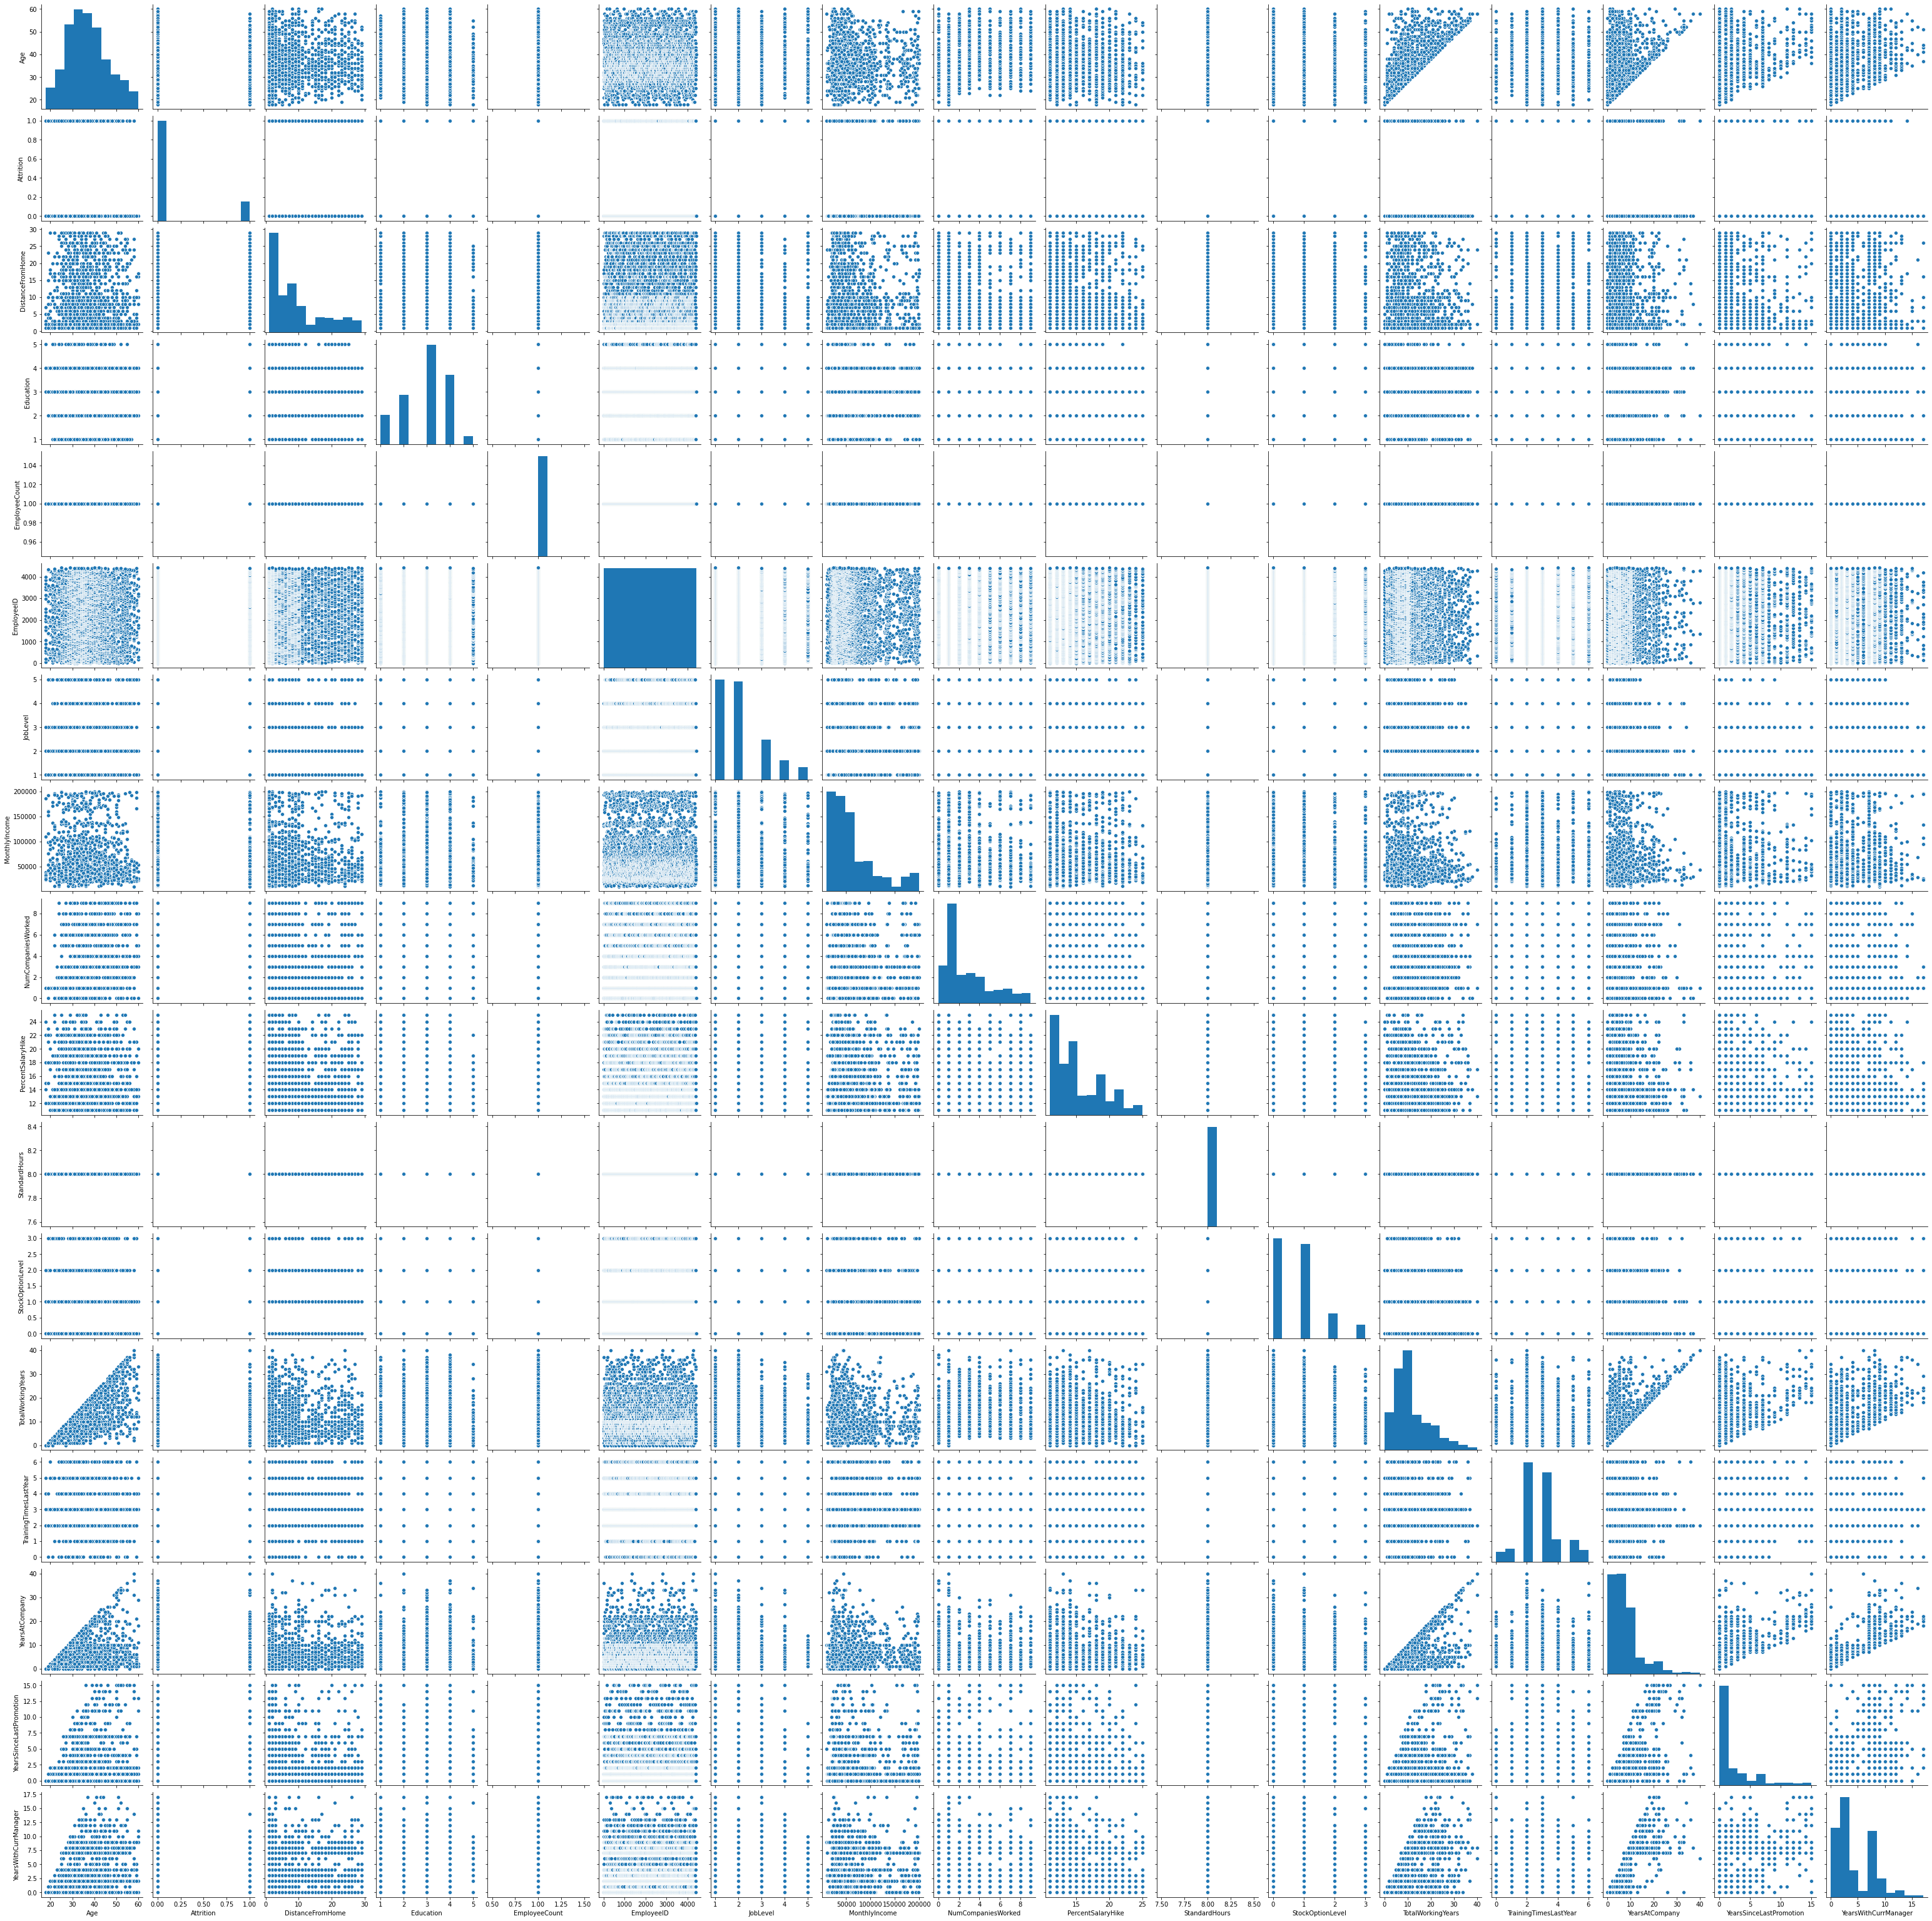

In [16]:
sns.pairplot(df)

# Apply Logistic Regression

In [17]:
Y = df.Attrition

In [18]:
Y

0       0
1       1
2       0
3       0
4       0
       ..
4405    0
4406    0
4407    0
4408    0
4409    0
Name: Attrition, Length: 4410, dtype: int64

In [19]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int64  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [21]:
df['BusinessTravel'] =  le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])


In [22]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [24]:
Y = df['Attrition']

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int64  
 2   BusinessTravel           4410 non-null   int64  
 3   Department               4410 non-null   int64  
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int64  
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [71]:
X = df[['Age','BusinessTravel','Department','EducationField','YearsWithCurrManager','YearsSinceLastPromotion','YearsAtCompany','TrainingTimesLastYear','MonthlyIncome','EmployeeCount']]

In [72]:
Y

0       0
1       1
2       0
3       0
4       0
       ..
4405    0
4406    0
4407    0
4408    0
4409    0
Name: Attrition, Length: 4410, dtype: int64

In [73]:
X

,Age,BusinessTravel,Department,EducationField,YearsWithCurrManager,YearsSinceLastPromotion,YearsAtCompany,TrainingTimesLastYear,MonthlyIncome,EmployeeCount
0,51,2,2,1,0,0,1,6,131160,1
1,31,1,1,1,4,1,5,3,41890,1
2,32,1,1,4,3,0,5,2,193280,1
3,38,0,1,1,5,7,8,5,83210,1
4,32,2,1,3,4,0,6,2,23420,1
...,...,...,...,...,...,...,...,...,...,...
4405,42,2,1,3,2,0,3,5,60290,1
4406,29,2,1,3,2,0,3,2,26790,1
4407,25,2,1,1,2,1,4,4,37020,1
4408,42,2,2,3,8,7,9,2,23980,1


In [74]:
import statsmodels.api as sm

In [75]:
X1 = sm.add_constant(X)

In [76]:
Logistic = sm.Logit(Y,X1)

In [77]:
result = Logistic.fit()

Optimization terminated successfully.
         Current function value: 0.410015
         Iterations 7


In [78]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4410
Model:                          Logit   Df Residuals:                     4400
Method:                           MLE   Df Model:                            9
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                 0.07172
Time:                        17:49:55   Log-Likelihood:                -1808.2
converged:                       True   LL-Null:                       -1947.9
Covariance Type:            nonrobust   LLR p-value:                 6.026e-55
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                        -0.0446      0.005     -8.622      0.000      -0.055      -0.034
BusinessTravel             -0.0284      0.064     -0.445      0.656      -0.154       0.097
Department                 -0.2501      0.079     -3.154      0.002      -0.405      -0.095
EducationField             -0.1160      0.033     -3.543      0.000      -0.180      -0.052
YearsWithCurrManager       -0.1288      0.021     -5.998      0.000      -0.171      -0.087
YearsSinceLastPromotion     0.1292      0.020      6.415      0.000       0.090       0.169
YearsAtCompany             -0.0440      0.016     -2.767      0.006      -0.075      -0.013
TrainingTimesLastYear      -0.1325      0.035     -3.821      0.000      -0.200      -0.065
MonthlyIncome            -2.61e-06   9.42e-07     -2.770      0.006   -4.46e-06   -7.63e-07
EmployeeCount               1.5292      0.272      5.615      0.000       0.995       2.063
===========================================================================================
"""

In [79]:
 from sklearn.linear_model import LogisticRegression


In [80]:
lr = LogisticRegression()

In [81]:
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=20)

In [92]:
X_test

,Age,BusinessTravel,Department,EducationField,YearsWithCurrManager,YearsSinceLastPromotion,YearsAtCompany,TrainingTimesLastYear,MonthlyIncome,EmployeeCount
913,40,2,2,2,3,0,4,0,36330,1
2163,41,0,2,1,9,11,19,3,27730,1
3819,22,0,2,2,3,1,4,3,97050,1
834,45,2,2,1,3,0,5,1,35800,1
1745,40,1,1,3,12,1,18,2,51260,1
...,...,...,...,...,...,...,...,...,...,...
117,49,2,2,5,0,0,5,3,52040,1
1320,25,2,1,5,1,2,2,3,88530,1
1698,37,2,2,2,0,1,3,3,20860,1
4187,43,2,2,5,4,1,5,3,12740,1


In [93]:
X_train

,Age,BusinessTravel,Department,EducationField,YearsWithCurrManager,YearsSinceLastPromotion,YearsAtCompany,TrainingTimesLastYear,MonthlyIncome,EmployeeCount
586,30,2,1,1,4,1,10,3,34480,1
1536,30,2,1,1,9,1,10,3,41970,1
1636,57,2,1,1,0,0,1,3,63060,1
2431,29,2,1,1,2,1,5,2,192370,1
3905,47,1,1,3,10,14,23,1,196270,1
...,...,...,...,...,...,...,...,...,...,...
1607,43,1,2,1,2,1,3,3,37480,1
3915,30,2,2,2,8,0,10,3,87220,1
1428,30,1,2,3,1,0,6,2,28620,1
4367,41,2,1,1,0,0,1,3,68830,1


In [94]:
y_test

913     1
2163    0
3819    0
834     0
1745    0
       ..
117     0
1320    0
1698    0
4187    0
3329    0
Name: Attrition, Length: 1323, dtype: int64

In [95]:
y_train

586     0
1536    0
1636    0
2431    0
3905    1
       ..
1607    0
3915    0
1428    1
4367    0
2522    0
Name: Attrition, Length: 3087, dtype: int64

In [96]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
y_pred = lr.predict(X_test)

In [105]:
lr.score(X_test,y_test)

0.8306878306878307

In [102]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])